# Display results of analysis

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv('../results/summary.csv')
df = df.set_index('name')
df

,total_words,distinct_words,alpha,C
name,,,,
Spanish_The_Odyssey,172847,16517,1.048837,8.314403
Latin_The_Odyssey,88648,18495,0.796686,31.900267
English_The_Iliad,171954,12950,1.225836,4.499602
French_The_Odyssey,59516,8069,0.942269,12.367618
Spanish_The_Iliad,182894,17998,1.039176,8.716805
Latin_The_Iliad,114480,23978,0.787345,36.011754
English_The_Odyssey,129183,9404,1.074733,7.209797
Greek_The_Odyssey,6348,2280,0.602293,52.476853
Greek_The_Iliad,171559,13303,1.198734,4.860994


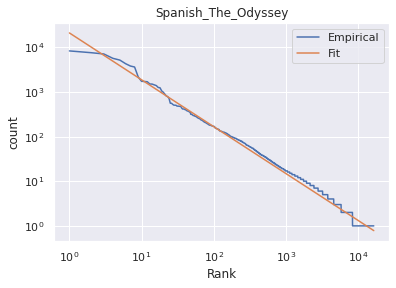

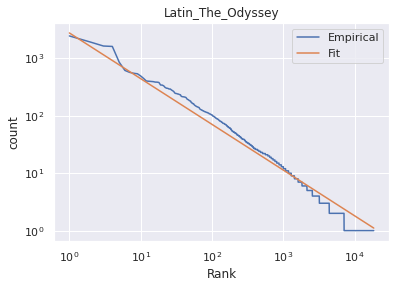

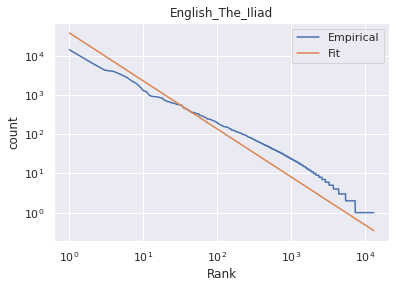

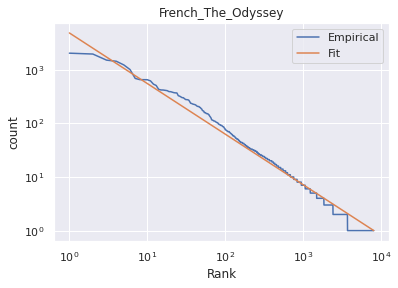

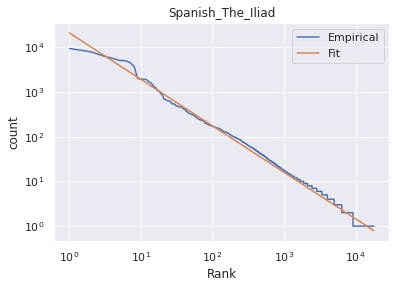

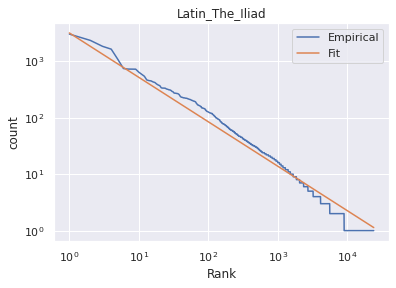

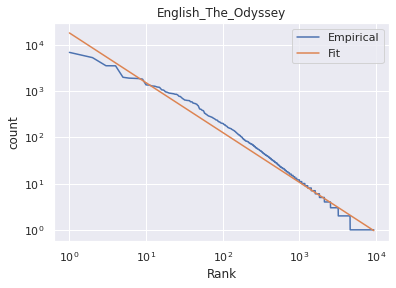

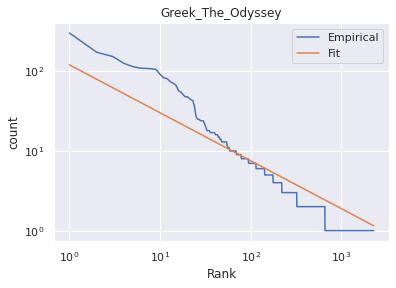

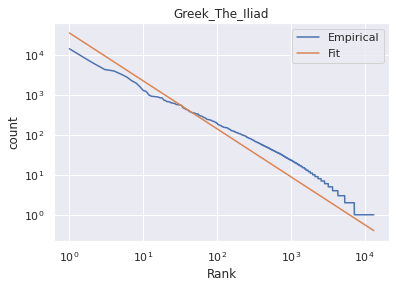

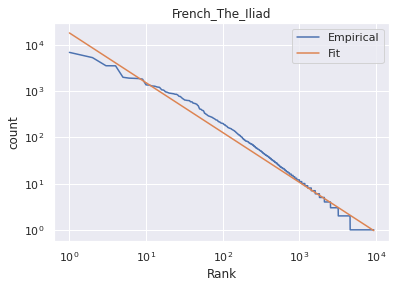

In [7]:
most_common = {}
for book, row in df.iterrows():
    plt.figure()
    df_c = pd.read_csv(f'../results/raw_counts/{book}.csv')
    rank = np.arange(df_c.shape[0]) + 1
    plt.loglog(rank, df_c.freq)
    plt.loglog(rank, df_c.freq.sum() / row.C * rank ** (-row.alpha) )
    plt.xlabel('Rank')
    plt.ylabel('count')
    plt.title(book)
    plt.legend(['Empirical', 'Fit'])
    plt.savefig('plot_'+ book +'.png')
    plt.show()
    most_common[book] = df_c.word[:10].values

In [8]:
# Show most common words for each text
pd.DataFrame(most_common)

,Spanish_The_Odyssey,Latin_The_Odyssey,English_The_Iliad,French_The_Odyssey,Spanish_The_Iliad,Latin_The_Iliad,English_The_Odyssey,Greek_The_Odyssey,Greek_The_Iliad,French_The_Iliad
0,de,et,the,de,de,et,the,και,the,the
1,y,autem,and,et,y,autem,and,ς,and,and
2,á,vero,of,le,á,vero,of,την,of,of
3,que,in,to,la,la,in,to,τον,to,to
4,la,quidem,his,les,el,quidem,a,το,his,a
5,el,sed,in,à,los,sic,i,ο,in,i
6,los,enim,with,que,que,sed,he,να,with,he
7,en,sic,a,il,en,enim,in,του,a,in
8,se,mihi,he,dans,las,ad,you,κ,he,you
9,las,me,from,je,por,the,for,τα,from,for
